In [1]:
import ROOT
from dm_migration import dm_migration

Welcome to JupyROOT 6.30/04


In [2]:
base_dir = '/eos/cms/store/user/fengwang/CMSDAS2024/'
tau_sample = f'{base_dir}/dy_nanoaod_v6_gen_tuple.root'
tau_file = ROOT.TFile.Open(tau_sample)
tau_tree = tau_file.Get('tree')

In [3]:
print([g.GetName() for g in tau_tree.GetListOfBranches()])

['run', 'lumi', 'event', 'nvtx', 'ngvtx', 'rho', 'gpud', 'npu', 'ntrueint', 'pud', 'eoot', 'loot', 'tau_pt', 'tau_eta', 'tau_phi', 'tau_mass', 'tau_dxy', 'tau_dz', 'tau_charge', 'tau_decayMode', 'tau_chargedIso', 'tau_leadTkDeltaEta', 'tau_leadTkDeltaPhi', 'tau_leadTkPtOverTauPt', 'tau_neutralIso', 'tau_photonsOutsideSignalCone', 'tau_puCorr', 'tau_rawAntiEle', 'tau_rawIso', 'tau_rawMVAnewDM2017v2', 'tau_rawAntiEleCat', 'tau_idAntiEle', 'tau_idAntiMu', 'tau_idMVAnewDM2017v2', 'tau_genPartIdx', 'tau_genPartFlav', 'tau_rawDeepTau2017v2p1VSjet', 'tau_rawDeepTau2017v2p1VSmu', 'tau_rawDeepTau2017v2p1VSe', 'tau_idDeepTau2017v2p1VSjet', 'tau_idDeepTau2017v2p1VSmu', 'tau_idDeepTau2017v2p1VSe', 'tau_idDecayMode', 'tau_idDecayModeNewDMs', 'tau_gen_pt', 'tau_gen_eta', 'tau_gen_phi', 'tau_gen_mass', 'tau_gen_charge', 'tau_gen_decayMode', 'tau_jet_pt', 'tau_jet_eta', 'tau_jet_phi', 'tau_jet_mass']


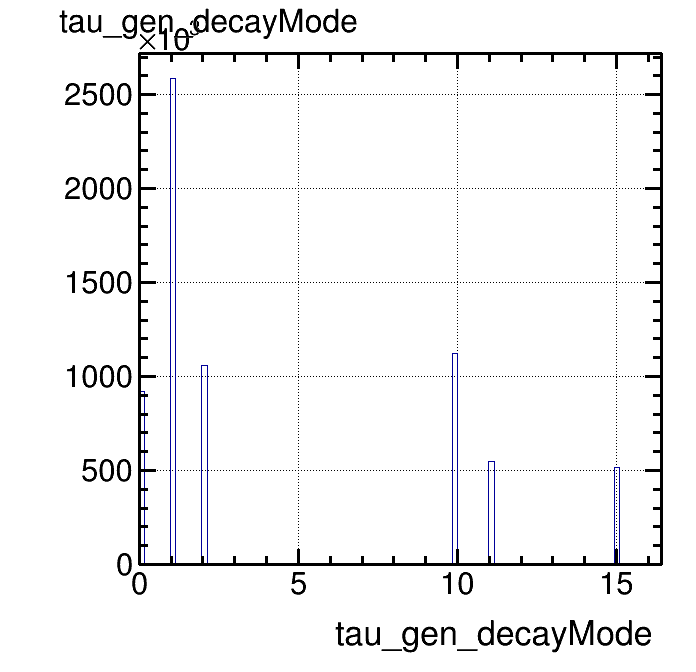

In [20]:
c1 = ROOT.TCanvas()
tau_tree.Draw('tau_gen_decayMode')
c1.Draw()

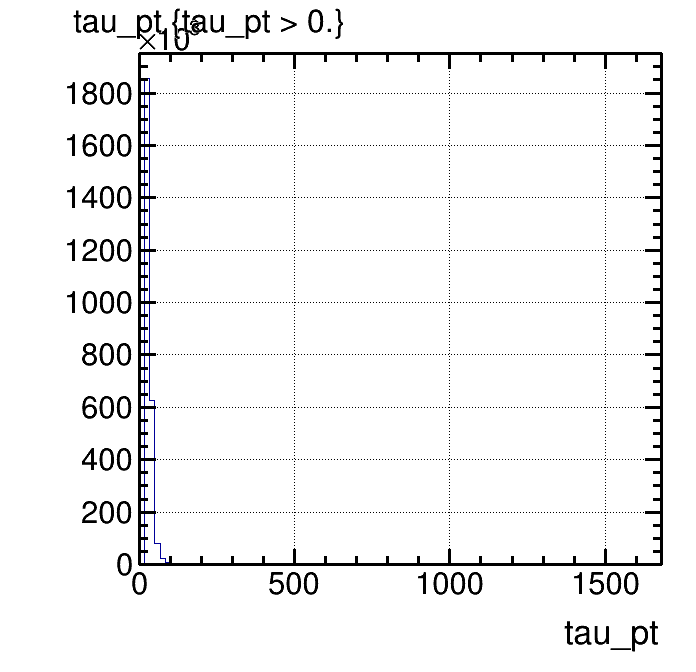

In [5]:
cv = ROOT.TCanvas()
# tau_tree.Draw('tau_pt')
# cv.Draw()
tau_tree.Draw('tau_pt', 'tau_pt > 0.') # only draw if tau was actually reconstructed
cv.Draw()

In [6]:
# We're interested in taus well within the tracker acceptance and with minimum pT
base_sel = 'tau_gen_pt>20. && abs(tau_gen_eta)<2.3'

n_all = tau_tree.Draw('1', base_sel)
n_pass = tau_tree.Draw('1', 'tau_pt>20 &&' + base_sel)
print(n_all, 'generated taus of which', n_pass, 'are reconstructed')
print(f'Efficiency: {n_pass/n_all:.3f}')
n_pass = tau_tree.Draw('1', 'tau_idDecayMode && tau_pt>20 &&' + base_sel)
print(n_pass, 'also pass the "old" decay mode finding')
print(f'Efficiency: {n_pass/n_all:.3f}')

2916433 generated taus of which 2134293 are reconstructed
Efficiency: 0.732
1770703 also pass the "old" decay mode finding
Efficiency: 0.607


In [7]:
# Select 1-prong taus without pi0s, which has decay mode 0 according to the formula above
base_sel = 'tau_gen_pt>20. && abs(tau_gen_eta)<2.3 && tau_gen_decayMode==0'
n_all = tau_tree.Draw('1', base_sel)
n_pass = tau_tree.Draw('1', 'tau_pt>20 &&' + base_sel)
print(f'Efficiency: {n_pass/n_all:.3f}')

Efficiency: 0.874


In [12]:
for gen_dm in [0, 1, 2, 10, 11, 15]:
    print(f'Investigating Tau DM {gen_dm}')
    base_sel = f'tau_gen_pt>20. && abs(tau_gen_eta)<2.3 && tau_gen_decayMode=={gen_dm}'
    n_all = tau_tree.Draw('1', base_sel)
    n_pass = tau_tree.Draw('1', 'tau_pt>20 &&' + base_sel)
    print(f'Efficiency: {n_pass/n_all:.3f}')

Investigating Tau DM 0
Efficiency: 0.874
Investigating Tau DM 1
Efficiency: 0.715
Investigating Tau DM 2
Efficiency: 0.639
Investigating Tau DM 10
Efficiency: 0.843
Investigating Tau DM 11
Efficiency: 0.743
Investigating Tau DM 15
Efficiency: 0.551


In [13]:
for gen_dm in [0, 1, 2, 10, 11]:
    print(f'Investigating Tau DM {gen_dm}')
    base_sel = f'tau_gen_pt>20. && abs(tau_gen_eta)<2.3 && tau_gen_decayMode=={gen_dm}'
    n_all = tau_tree.Draw('1', base_sel)
    n_pass = tau_tree.Draw('1', f'tau_pt>20 && tau_decayMode=={gen_dm} &&' + base_sel)
    print(f'Efficiency: {n_pass/n_all:.3f}')

Investigating Tau DM 0
Efficiency: 0.794
Investigating Tau DM 1
Efficiency: 0.523
Investigating Tau DM 2
Efficiency: 0.000
Investigating Tau DM 10
Efficiency: 0.592
Investigating Tau DM 11
Efficiency: 0.334


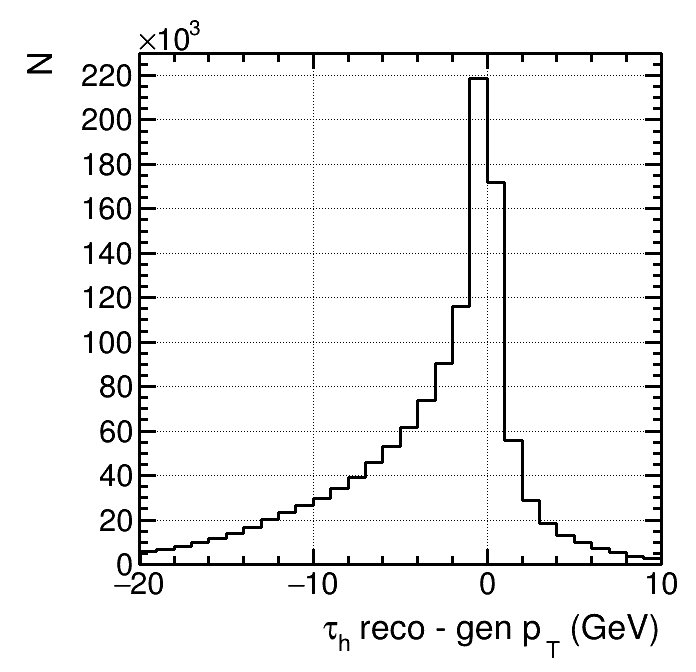

In [14]:
base_sel = 'tau_gen_pt>30. && abs(tau_gen_eta)<2.3'
h_res = ROOT.TH1F('h_res', '', 30, -20., 10.)
h_res.GetXaxis().SetTitle("#tau_{h} reco - gen p_{T} (GeV)")
h_res.GetYaxis().SetTitle("N")
tau_tree.Project('h_res', 'tau_pt - tau_gen_pt', base_sel)
canvas = ROOT.TCanvas()
h_res.Draw()
canvas.Draw()

Warning in <TNetXNGFile::Append>: Replacing existing TH1: h_res (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: h_res (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: h_res (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: h_res (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: h_res (Potential memory leak).
Warning in <TNetXNGFile::Append>: Replacing existing TH1: h_res (Potential memory leak).


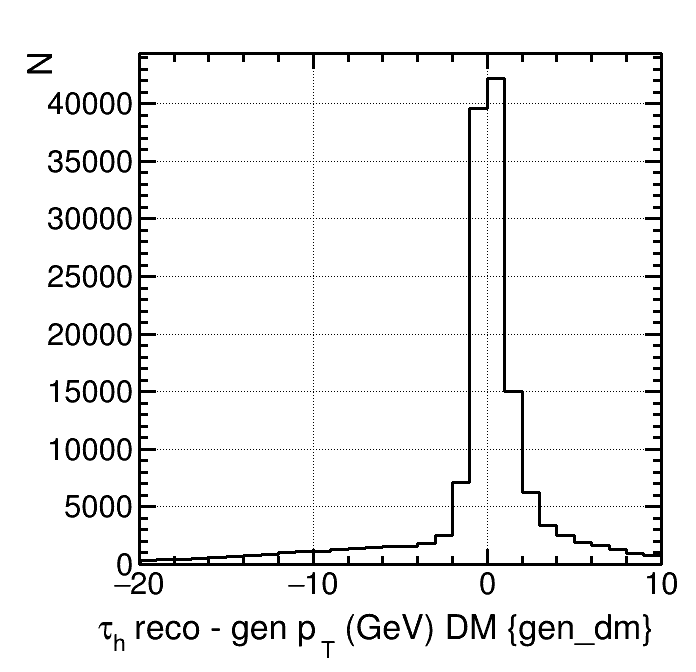

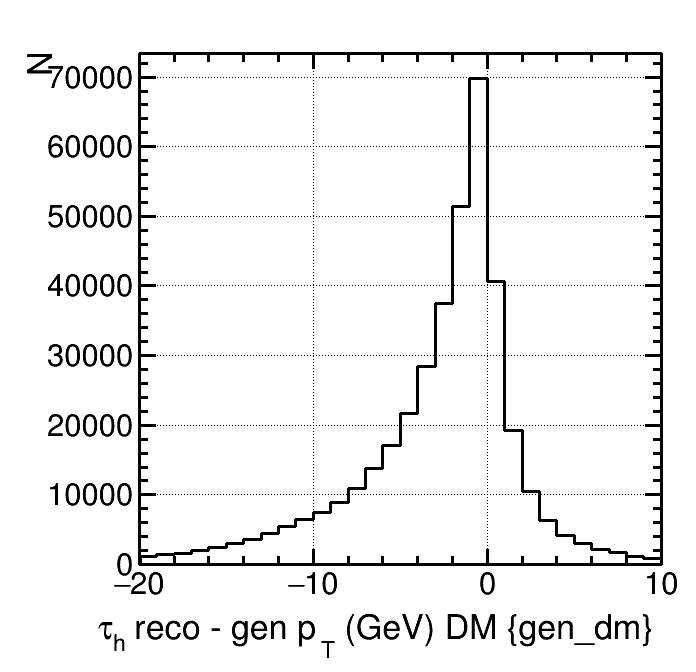

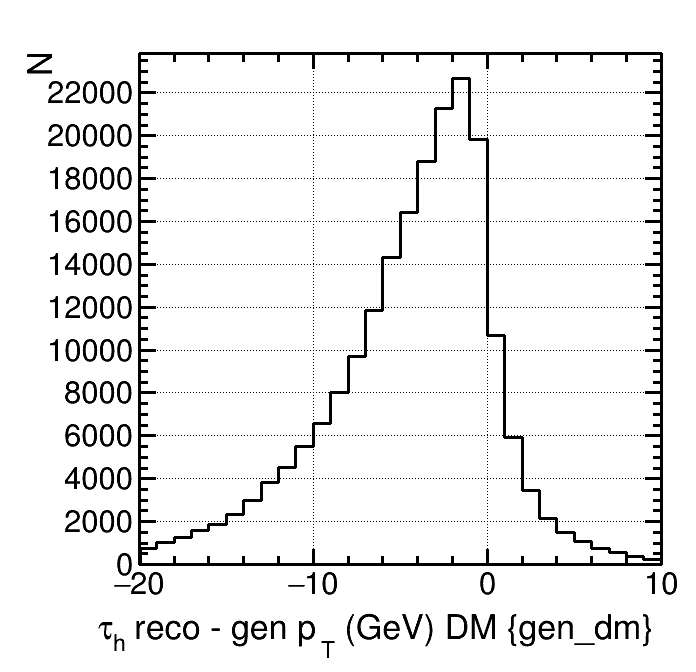

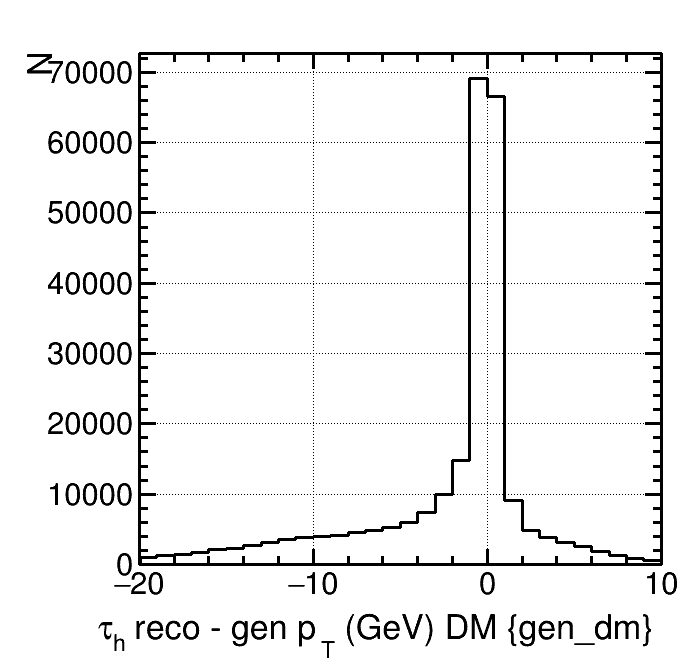

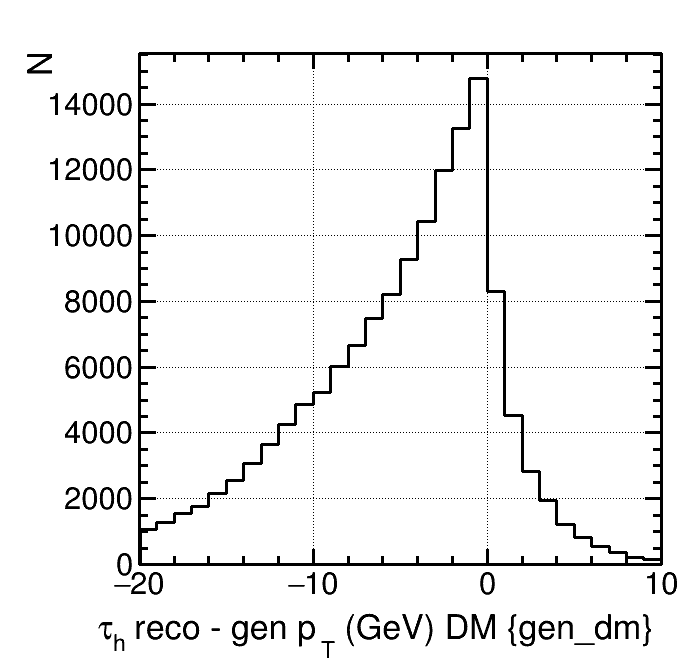

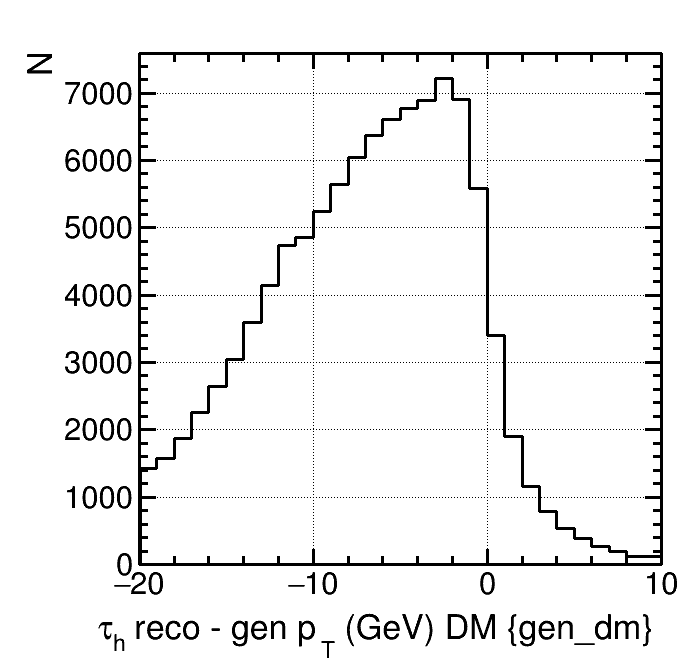

In [16]:
keeper = []
for gen_dm in [0, 1, 2, 10, 11, 15]:
    base_sel = f'tau_gen_pt>30. && abs(tau_gen_eta)<2.3 && tau_gen_decayMode == {gen_dm}'
    h_res = ROOT.TH1F('h_res', '', 30, -20., 10.)
    h_res.GetXaxis().SetTitle("#tau_{h} reco - gen p_{T} (GeV) DM {gen_dm}")
    h_res.GetYaxis().SetTitle("N")
    tau_tree.Project('h_res', 'tau_pt - tau_gen_pt', base_sel)
    canvas = ROOT.TCanvas()
    keeper.append(canvas)
    keeper.append(h_res)
    h_res.Draw()
    canvas.Draw()

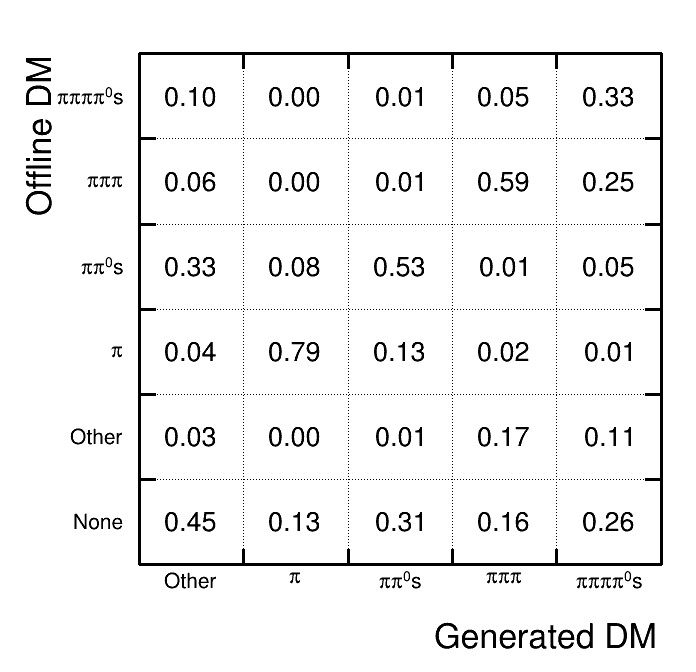

In [17]:
canvas = dm_migration(tau_tree)
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: decay_mode_matrix
Warning in <TNetXNGFile::Append>: Replacing existing TH1: migration (Potential memory leak).


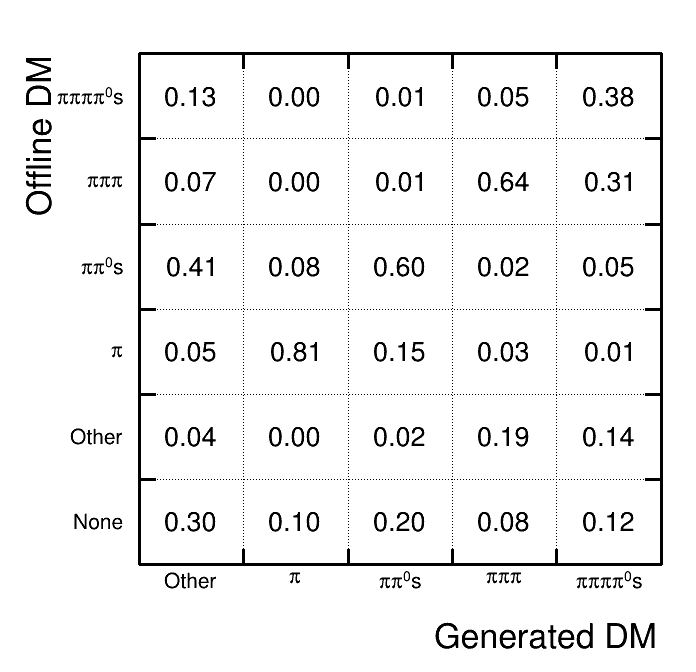

In [18]:
canvas = dm_migration(tau_tree, gen_cut='tau_gen_pt>30 && abs(tau_gen_eta)<2.3')
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: decay_mode_matrix
Warning in <TNetXNGFile::Append>: Replacing existing TH1: migration (Potential memory leak).


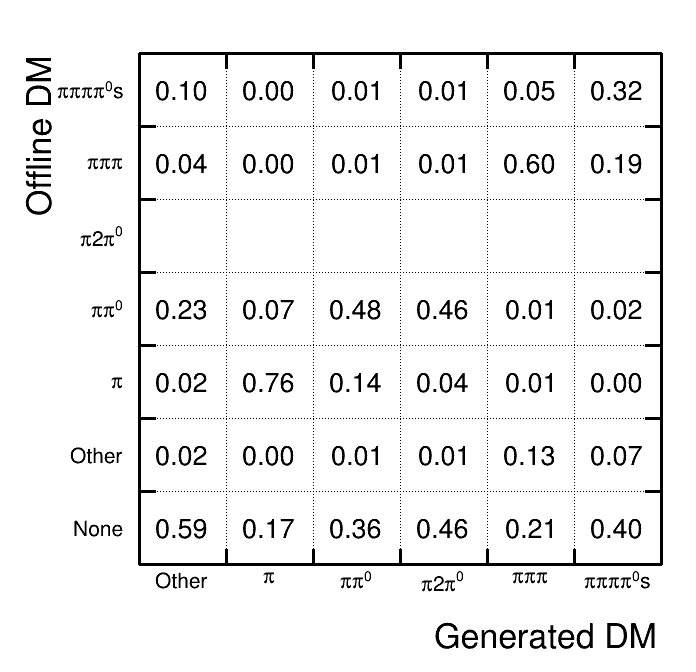

In [19]:
tau_decayMode_string = ('-2'
                         '+ (tau_pt>30 && tau_decayMode>=0 && tau_decayMode <200)*(1 ' # will contain reco DM 5 and 6 and other gen DMs
                            '+ (tau_decayMode==0)'
                            '+ 2*(tau_decayMode==1)'
                            '+ 3*(tau_decayMode==2)'
                            '+ 4*(tau_decayMode==10)'
                            '+ 5*(tau_decayMode==11))'
            )
labels = ['None', 'Other', '#pi', '#pi#pi^{0}', '#pi2#pi^{0}', '#pi#pi#pi', '#pi#pi#pi#pi^{0}s']
canvas = dm_migration(tau_tree, tau_decayMode_string=tau_decayMode_string, labels=labels)
canvas.Draw()